In [143]:
from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)

In [21]:
spfive_closefull = pd.read_csv('sp500_closefull.csv',
                               infer_datetime_format=True,
                               parse_dates=True,
                               index_col=['Date'])
spfive_closefull

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,GILD,NLSN,EQIX,TIF,MDT,V,QRVO,A,MO,SWKS,MCHP,CDNS,WLTW,CHTR,EIX,BBY,WBA,HCA,AJG,DTE,C,T,CF,DISH,MGM,XL,HUM,CBOE,CFG,WU,APH,SYY,MSI,FCX,ADM,LH,STI,UTX,PKI,LNT,BAC,LNC,PSX,GPN,SRCL,PPG,IRM,IQV,ESS,NOV,NAVI,HAL,STZ,FLS,DXC,ADI,F,HOG,ADBE,TDG,ULTA,ARE,SYK,CB,TSN,FLR,PEP,PEG,LLY,COST,REG,NWS,LOW,MDLZ,FMC,XEL,AIZ,PDCO,CERN,MET,CHK,FTV,DLR,XRAY,SCG,FAST,TJX,SNA,MPC,D,...,IFF,ANTM,GPS,BLL,QCOM,LYB,GIS,PHM,ROST,LUV,ALXN,XEC,MS,CPB,OKE,BK,SYF,CHD,SLG,MHK,INFO,DAL,APA,K,JWN,AFL,ADS,CSX,NI,PFG,NCLH,ZION,RJF,HBAN,UNH,PRU,GPC,FISV,WMB,EQR,PBCT,KSU,DVA,AIG,MA,HBI,HON,O,NWSA,AES,SLB,XRX,TGT,AAPL,MKC,WY,APD,GRMN,AEE,HLT,DLTR,HAS,WMT,NTAP,KIM,BAX,LMT,KEY,UNM,BMY,PSA,WYNN,RHI,EFX,NUE,PKG,NBL,CTSH,SWK,MU,TRV,L,AEP,CI,SNI,JNJ,WM,DOV,FTI,AGN,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.800000,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,21.650000,NaN,109.559998,43.990002,43.900002,22.035000,NaN,22.389128,19.790001,14.820000,29.180000,6.120000,70.913910,NaN,34.770000,40.189999,37.299999,NaN,22.330000,43.540001,34.000000,28.580000,18.368000,21.180000,9.730000,NaN,45.680000,NaN,NaN,19.090000,22.969999,28.100000,32.218723,41.730000,31.469999,76.370003,20.440001,71.629997,20.639999,15.175000,15.690000,25.879999,NaN,26.334999,55.160000,30.299999,21.155268,NaN,82.620003,41.559963,NaN,31.250000,16.120001,32.336666,28.686020,31.670000,10.28,25.459999,37.090000,49.400002,18.850000,63.549999,52.160000,49.270000,12.240000,46.009998,61.240002,33.630001,35.820000,59.410000,34.770000,NaN,23.160000,27.430000,24.640070,21.080000,30.160000,28.809999,21.067499,32.352940,5315.042480,NaN,50.150002,35.330002,NaN,10.507500,9.010000,42.860001,NaN,38.959999,...,42.009998,59.750000,20.540001,13.122500,46.939999,NaN,35.450001,10.240000,10.672500,11.180000,24.125000,55.169998,30.910000,33.869999,19.952723,28.290001,NaN,15.335000,48.930000,48.310001,NaN,11.220000,105.870003,52.830002,37.919998,23.785000,65.889999,16.286667,6.094303,25.000000,NaN,13.330000,24.270000,3.68,31.530001,51.770000,38.130001,12.357500,17.616472,33.400002,16.75,33.650002,29.959999,29.889999,25.684000,6.1750,38.468460,26.100000,NaN,13.67,67.110001,22.740448,48.549999,30.572857,36.299999,44.279999,76.928772,32.180000,27.760000,NaN,16.056667,32.540001,54.230000,34.189999,13.66,31.662140,76.849998,5.94,19.940001,25.629999,80.129997,63.959999,27.120001,31.469999,47.790001,23.389999,36.610001,23.400000,52.709999,10.850000,49.810001,37.180000,34.939999,36.369999,NaN,64.680000,34.160000,28.395418,29.615000,40.290001,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.200000,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.910000,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,21.629999,NaN,108.540001,44.279999,44.799999,21.782499,NaN,22.145924,19.799999,15.050000,28.719999,6.060000,70.754967,35.000000,34.459999,41.209999,37.000000,NaN,22.209999,43.049999,35.299999,28.440001,18.666000,21.049999,10.500000,NaN,45.660000,NaN,NaN,19.010000,22.490000,27.980000,31.774050,41.980000,31.639999,75.440002,20.719999,70.559998,20.889999,15.530000,16.200001,26.420000,NaN,26.280001,54.669998,30.320000,21.219963,NaN,83.120003,42.281334,NaN,31.650000,15.920000,32.696667,28.676083,31.620001,10.96,25.650000,37.700001,49.869999,18.760000,62.880001,52.650002,48.160000,12.470000,45.980000,61.980000,33.599998,35.189999,59.230000,35.020000,NaN,22.920000,28.770000,24.557676,20.830000,31.059999,28.709999,22.312500,33.101604,5481.551758,NaN,50.480000,34.910000,NaN,10.725000,9.252500,42.840000,NaN,38.480000,...,41.700001,60.400002,20.790001,12.975000,48.070000,NaN,35.119999,10.370000,10.867500,11.770000,23.780001,55.070000,32.040001,33.930000,19.777622,28.590000,NaN,15.127500,48.020000,48.1199

In [22]:
fullsend = spfive_closefull[['FLS','FTI','MET', 'TPR','HAL', 'PPL']]
symbols = ['FLS','FTI','MET', 'TPR','HAL', 'PPL']
#AME = spfive_closefull[['AME']]
#amt = spfive_closefull[['AMT']]
#AXP = spfive_closefull[['AXP']]
noa = len(symbols)

,FLS,FTI,MET,TPR,HAL,PPL
Date,,,,,,
2010-01-04,32.336666,29.615000,32.352940,36.310001,31.250000,30.242558
2010-01-05,32.696667,30.125000,33.101604,36.750000,31.650000,29.851370
2010-01-06,33.599998,30.264999,33.440285,37.470001,32.400002,29.916569
2010-01-07,34.523335,29.915001,33.912655,37.490002,32.480000,29.627834
2010-01-08,35.959999,30.450001,34.090908,37.270000,34.119999,29.534695
...,...,...,...,...,...,...
2018-12-24,35.889999,18.540001,38.240002,32.299999,25.139999,27.590000
2018-12-26,38.220001,19.639999,40.189999,33.889999,26.430000,28.309999
2018-12-27,37.930000,19.590000,40.950001,34.150002,26.360001,28.340000


<AxesSubplot:xlabel='Date'>

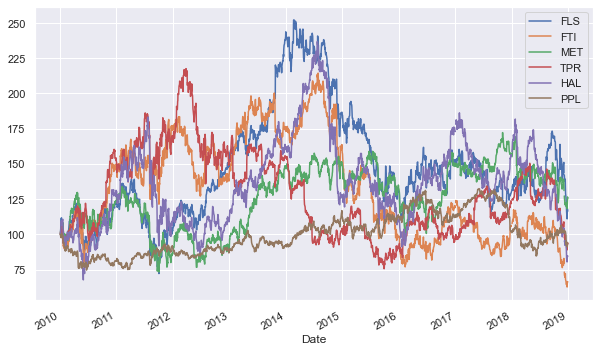

In [23]:
display(fullsend)
(fullsend / fullsend.iloc[0] * 100).plot(figsize=(10, 6))

,FLS,FTI,MET,TPR,HAL,PPL
Date,,,,,,
2018-12-24,-0.042281,-0.033416,-0.010147,-0.015666,-0.027850,-0.028936
2018-12-26,0.062900,0.057638,0.049736,0.048053,0.050040,0.025762
2018-12-27,-0.007617,-0.002549,0.018734,0.007643,-0.002652,0.001059
2018-12-28,-0.007409,0.004075,-0.008091,-0.010006,0.003786,0.000353
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'FLS'}>,
        <AxesSubplot:title={'center':'FTI'}>],
       [<AxesSubplot:title={'center':'MET'}>,
        <AxesSubplot:title={'center':'TPR'}>],
       [<AxesSubplot:title={'center':'HAL'}>,
        <AxesSubplot:title={'center':'PPL'}>]], dtype=object)

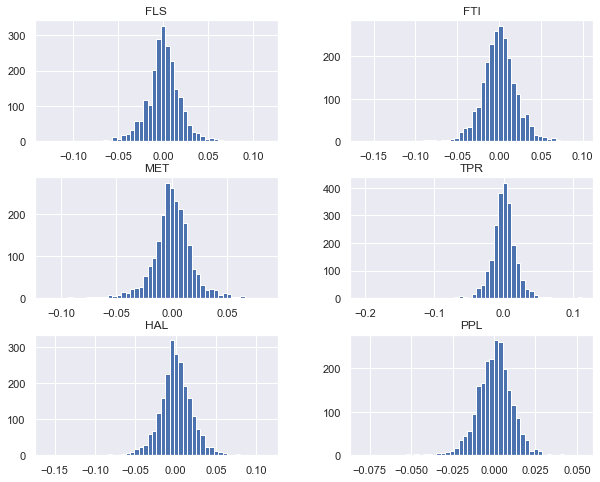

In [24]:
log_returns = np.log(fullsend / fullsend.shift(1))
display(log_returns.tail())
log_returns.hist(bins=50, figsize=(10, 8))

In [25]:
log_returns.mean() * 252 # Annualized mean returns

FLS    0.012932
FTI   -0.042604
MET    0.028030
TPR   -0.010869
HAL   -0.013463
PPL   -0.008349
dtype: float64

In [26]:
X = log_returns[:200].cov() * 252 # Annualized covariance matrix
X

,FLS,FTI,MET,TPR,HAL,PPL
FLS,0.129694,0.115541,0.085063,0.075499,0.104021,0.031598
FTI,0.115541,0.204924,0.099776,0.080291,0.145178,0.039948
MET,0.085063,0.099776,0.132475,0.078968,0.078929,0.032516
TPR,0.075499,0.080291,0.078968,0.105926,0.067191,0.029165
HAL,0.104021,0.145178,0.078929,0.067191,0.195661,0.044165
PPL,0.031598,0.039948,0.032516,0.029165,0.044165,0.050437


In [27]:
y = log_returns[:200].std()
y

FLS    0.022686
FTI    0.028516
MET    0.022928
TPR    0.020502
HAL    0.027865
PPL    0.014147
dtype: float64

In [28]:
"""
# The Basic Theory 
In what follows no shorts are allowed, Only long. Impling that 100% of the investors wealth has to be divided in longs

The code generates four uniformly distributed random numbers between 0 and 1 and then
normalizes the values such that the sum of all values = 1:
"""
import math

weights = np.random.random(noa) # Random portfolio weights

weights /= np.sum(weights) # Normalized to 1 or 100%

display(weights)

display(weights.sum())

array([0.13433723, 0.20444267, 0.16487661, 0.13170425, 0.18473732,
       0.17990193])

1.0

In [29]:
np.sum(log_returns.mean() * weights) * 252 # Annualized portfolio return given the porfolio weights

-0.007772067157282369

In [30]:
np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)) # Annualized portfolio variance given the portfolio weights

0.047039318309461856

In [31]:
math.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights))) # Annualized portfolio volatility givan the portfolio weights.

0.216885495848528

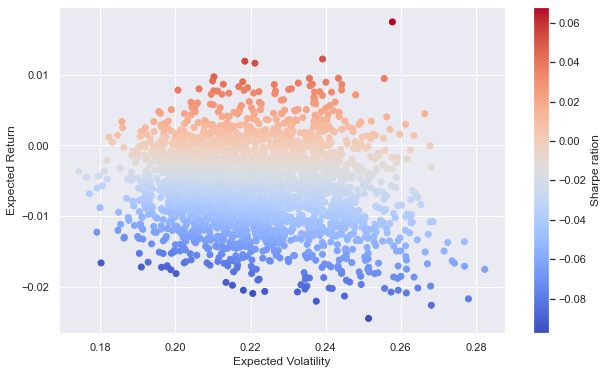

In [32]:
"""
# Python and Vectorization
The MPT example shows how efficient it is with python to translate mathematical concepts,
like portfolio return or portfolio variance. in executable, vectorized code.

The following implements a Monte Carlo simulation to generate random portfolio weight vectors on a larger scale.
For every simulated allocation, the code records the resulting expected portfolio return and variance.
Two fucntions are created port_ret(), port_vol().
"""

def port_ret(weights):
    return np.sum(log_returns.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))


prets = []
pvols = []

for p in range(2500): # Monto Carlo simulation of poftfolio weights
    weights = np.random.random(noa) #  Monto Carlo simulation of poftfolio weights
    weights /= np.sum(weights) #  Monto Carlo simulation of poftfolio weights
    prets.append(port_ret(weights)) # Collects the resulting statistics in list objects 
    pvols.append(port_vol(weights))  # Collects the resulting statistics in list objects 
prets = np.array(prets)
pvols = np.array(pvols)


# The results of the Monte Carlo simulation

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c = prets /pvols,
           marker='o', cmap='coolwarm')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe ration')

In [33]:
"""
The only input that is missing for a call  of the optimazation funtion is a starting parameter list
(initial guess for the weights vector) An equal distribution of weights will do.
""" 
import scipy.optimize as  sco 

def min_func_sharpe(weights): # Function to be minimized 
    return -port_ret(weights) / port_vol(weights) # Function to be minimized 

cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1}) # Equality constraint

bnds = tuple((0, 1) for x in range(noa)) # Bounds for the parameters

eweights = np.array(noa * [1. / noa,]) # Equal weights vector.

display(eweights)

display(min_func_sharpe(eweights))

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

0.026575043279895585

In [34]:
"""
This fucntion returns more than just the optimal parameter values. The results are stored in an object called opts.
The main interest lies in getting the optimal portfolio composition. One can access the results object with the key of intrest x.
"""
%time 
opts = sco.minimize(min_func_sharpe, eweights,
                   method='SLSQP', bounds=bnds,
                   constraints=cons) # The optimization (minimization of function min_func_sharpe)

Wall time: 0 ns


In [35]:
opts # The results from the optimization

     fun: -0.09499395932486984
     jac: array([ 0.01099869,  0.19904072, -0.        ,  0.0789487 ,  0.10029755,
        0.04059893])
 message: 'Optimization terminated successfully'
    nfev: 56
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([2.77555756e-17, 1.30104261e-16, 1.00000000e+00, 0.00000000e+00,
       4.51028104e-17, 0.00000000e+00])

In [36]:
cash_flow = pd.read_csv('us-cashflow-annual.csv',infer_datetime_format=True, parse_dates=True, delimiter=';')
cash_flow.rename(columns={'Report Date':'Date'}, inplace=True)

In [37]:
cash_flow.set_index(['Date', 'Ticker'], inplace=True)


In [64]:
cash_flow = cash_flow.fillna(0)
scaled_data_date = cash_flow.dropna(axis=1)


In [66]:
ml_data = (scaled_data_date.drop(columns=['Currency','SimFinId','Fiscal Year','Fiscal Period','Publish Date','Restated Date']) / 10000000).round(3)




In [40]:
#ml_data['Ticker'] = scaled_data_date['Ticker']

In [67]:
date_ml_data = (ml_data[ml_data.index.get_level_values(level=0) > "2017-02-14"]) 

In [101]:
working_class = pd.read_csv('scaled_datat_willwork.csv',
                               infer_datetime_format=True,
                               parse_dates=True,
                               index_col=['Ticker','Date'])

scaled_data_date = working_class.copy()

In [102]:
scaled_data_date.drop(columns=['bad_health', 'good_health'], inplace=True)

In [103]:
scaled_data_date['bad_health'] = (scaled_data_date['Cost of Revenue'] > scaled_data_date['Revenue'] + scaled_data_date['Total Current Assets'])

scaled_data_date['smart_managed'] = (scaled_data_date['Short Term Debt'] < scaled_data_date['Retained Earnings'] + scaled_data_date['Net Cash from Financing Activities'])

In [168]:
"""
# Decision Tress
Decision Tress are versatile MLA performing both classification and regression tasks, and multioutput task.
Powerful algos capable of fitting complex datasets. 

Training and Visualizing a Decison Tree

This code trains a DecisionTreeClassifer 

"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = scaled_data_date.drop(columns=['bad_health'])
y = scaled_data_date['bad_health']
y

Ticker  Date      
ABM     2019-10-31    False
ABT     2019-12-31    False
ABTL    2018-12-31     True
ACA     2019-12-31    False
ACI     2018-02-28    False
                      ...  
ZDGE    2018-07-31     True
ZEN     2019-12-31    False
ZEUS    2019-12-31     True
ZG      2018-12-31    False
        2019-12-31     True
Name: bad_health, Length: 1211, dtype: bool

#iris = load_iris()

X = zet_data.drop(columns='pct_change').values

y = zet_data['pct_change'].values

Number_X = y[: :1]

In [169]:
#_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=14)


In [170]:
>>> from sklearn.datasets import make_classification
>>> from sklearn.linear_model import LogisticRegression
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.pipeline import make_pipeline
>>> from sklearn.preprocessing import StandardScaler
>>> #X, y = make_classification(random_state=42)
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
>>> pipe = make_pipeline(StandardScaler(), LogisticRegression())
>>> pipe.fit(X_train, y_train)  # apply scaling on training data


>>> pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.6171617161716172

In [171]:
"""
You can visualize the trained Decision Tree by first using the export_grapviz() method to output
a graph definition file called iris_tree.dot:
"""

'\nYou can visualize the trained Decision Tree by first using the export_grapviz() method to output\na graph definition file called iris_tree.dot:\n'

In [172]:
"""
# Estimating Class Probabilities

A Decision Tree can also estimate the probability that an instance belongs to a particular class K.

First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.

A flower petal 5 cm long and 1.5 cm wide 


"""

'\n# Estimating Class Probabilities\n\nA Decision Tree can also estimate the probability that an instance belongs to a particular class K.\n\nFirst it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node.\n\nA flower petal 5 cm long and 1.5 cm wide \n\n\n'

In [173]:
"""
# Regression

Decision Trees are also capable of performing regression tasks. Let's build a regression tree using Scitkit-Learn:
DecisionTreeRegressor class, training it on a noisy quadratic dataset with max_depth=2:
"""
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeClassifier(max_depth=2)

tree_clf.fit(X_train, y_train)

tree_clf.predict(X_test[:15])

array([False,  True, False, False, False, False,  True, False,  True,
       False, False, False,  True, False, False])

In [174]:
"""
Chapter 7 Enseble Learning and Random Forest 
Ensemble methods work best when the predictors are as independent from onw another as possible.
One way tp get diverse classifiers is to train them using very diffrent algos. This increaces the chance that they will make very diffrent errors.
Improving the ensembles accuracy.

The following code creates and trains a voting classifer in sklearn composed of three diverse classifiers.
"""

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')


In [175]:
X_train

,,SimFinId,Shares (Basic),Shares (Diluted),Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Research & Development,Depreciation & Amortization_x,Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Inventories,Total Current Assets,"Property, Plant & Equipment, Net",Long Term Investments & Receivables,Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Short Term Debt,Total Current Liabilities,Long Term Debt,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Treasury Stock,Retained Earnings,Total Equity,Total Liabilities & Equity,Net Income/Starting Line,Depreciation & Amortization_y,Non-Cash Items,Change in Working Capital,Change in Accounts Receivable,Change in Inventories,Change in Accounts Payable,Change in Other,Net Cash from Operating Activities,Change in Fixed Assets & Intangibles,Net Change in Long Term Investment,Net Cash from Acquisitions & Divestitures,Net Cash from Investing Activities,Dividends Paid,Cash from (Repayment of) Debt,Cash from (Repurchase of) Equity,Net Cash from Financing Activities,Net Change in Cash,smart_managed
Ticker,Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MAR,2018-12-31,-0.090909,4.436335,4.440860,32.591715,58.950170,10.033696,4.311895,6.632142,0.000000,27.285357,20.747757,-141.000000,-442.666667,20.536871,1.421875,19.201585,13.445910,21.236474,0.000000,21.236474,21.236474,1.855078,20.131365,0.000000,10.661782,85.091549,0.000000,160.977704,148.671991,62.651015,23.214630,12.655738,34.446035,7.409719,309.619835,92.352174,9091.187500,2.309433,55.317010,14.638178,62.651015,21.236474,34.544431,8.795222,-6.071249,0.0,0.0,0.0,0.0,15.043836,4.924951,0.000000,-1.000000,2.781818,3.199536,61.450000,22.425796,18.540703,-6.974026,True
TGNA,2019-12-31,0.000000,0.004441,0.006278,0.041780,0.152271,-0.061410,0.138615,0.106474,0.000000,0.274686,-0.193803,-0.033778,0.069822,-0.254904,-0.543590,-0.261544,-0.167179,-0.286789,-1.000000,-0.294384,-0.294384,-0.783601,0.367560,0.000000,0.113504,0.294494,0.012617,0.362052,0.345791,0.317830,-0.430465,0.000000,-0.021830,0.419352,0.402540,0.362731,-0.086054,-0.015027,0.035085,0.186036,0.317830,-0.294384,0.274686,-1.476298,-2.735746,0.0,0.0,0.0,0.0,-0.435766,0.180723,-0.935412,3.610358,3.175712,0.005474,-18.470134,-1.000000,-8.998482,-14.613811,False
SQBG,2019-12-31,0.000000,0.018868,0.018868,-0.402330,0.000000,-0.402330,-0.159603,0.000000,0.000000,0.000000,-0.881056,-0.110917,-0.134996,7.654321,0.000000,7.654321,11.608696,7.108434,-0.164596,14.209924,14.209924,-0.556343,-0.204637,0.000000,-0.371206,-0.362336,0.000000,-0.325214,-0.325530,-0.329508,0.355172,-0.549470,-0.363350,-0.261996,-0.239732,-0.250429,0.001458,-0.236407,0.679150,-0.497911,-0.329508,7.108434,0.459941,-0.988502,-4.100000,0.0,0.0,0.0,0.0,-0.896353,-1.500000,-2.066667,-5.658338,-978.294118,0.000000,15.919797,-0.888889,3.791464,0.820930,True
OUT,2018-12-31,0.000000,-0.481732,-0.482791,-0.440107,-0.076072,-0.614922,-0.646527,-0.604651,0.000000,-0.356611,-0.544904,-0.002689,-0.079728,-0.688845,0.105823,-0.753274,-0.968375,-0.622252,0.000000,-0.622067,-0.622067,-0.943996,-0.428824,0.000000,-0.724914,1.617358,0.000000,-0.551492,-0.466596,-0.517430,-0.454360,15.000000,-0.603240,-0.174780,-0.248399,-0.337318,0.125233,0.000000,-1.412322,-0.705174,-0.517430,-0.622252,-0.607160,-0.685758,-3.534935,0.0,0.0,0.0,0.0,-0.755443,0.165414,0.000000,-0.981758,-0.805395,0.207509,-9.000000,-0.512584,-0.206713,-0.977654,False
MRC,2019-12-31,0.000000,-0.078801,-0.086057,-0.122244,-0.136090,-0.052250,-0.021352,-0.021352,0.000000,0.000000,-0.188976,0.193548,0.052632,-0.312500,0.000000,-0.305

In [176]:
>>> from sklearn import preprocessing
>>> import numpy as np
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> scaler
StandardScaler()

>>> scaler.mean_

>>> scaler.scale_

>>> X_scaled = scaler.transform(X_train)
>>> X_scaled


array([[-0.23356993,  0.11178065,  0.02173746, ..., -0.03344336,
         0.03231024,  1.60024508],
       [-0.20590921, -0.15133121, -0.10215609, ..., -0.05424427,
         0.03120798, -0.62490428],
       [-0.20590921, -0.1504747 , -0.10180436, ..., -0.04458376,
         0.03343488,  1.60024508],
       ...,
       [-0.46022272,  2.01468756,  0.92194259, ..., -0.06002154,
         0.03371723, -0.62490428],
       [ 0.02629529, -0.198183  , -0.1242962 , ..., -0.04832215,
         0.03323958, -0.62490428],
       [ 0.06546492, -0.19434136, -0.12245353, ..., -0.04821514,
         0.03317184, -0.62490428]])

In [177]:
voting_clf.fit(X_scaled, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [178]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_scaled, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.6039603960396039
RandomForestClassifier 0.7953795379537953
SVC 0.6171617161716172
VotingClassifier 0.6897689768976898


In [208]:
"""
The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifer can estimate class probabilities
(it has the predict_proba() method), which is the case with Decision Tree classifiers.
"""

'\nThe BaggingClassifier automatically performs soft voting instead of hard voting if the base classifer can estimate class probabilities\n(it has the predict_proba() method), which is the case with Decision Tree classifiers.\n'

In [201]:
"""
# Bagging and Pasting 
Another approach is to use the same tranning algos for every prediction and train them on diffrent subsets of the training set.

When sampling is performed with replacement, this method is called bagging. (Short for bootstrap aggragating) 
When sampling is perfomed without replacement, it is called pasting.

Sklearn offers a simple API for both baggging and pasting with the BaggingClassifier class (or BaggingRegressor for regression)
The following code trains an ensemble of 500 decision tress classifiers each is trained on 100 training instances randomly sampled form
the trainin set with replacement (this is an example of bagging but if you want to use pasting instead set Bootstrap=False)
n_jobs tells sklearn the number of CPU cores to use for training and predictions(-1 == use all available cores)
"""

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs = -1, oob_score=True)
bag_clf.fit(X_scaled, y_train)
bag_clf.oob_score_

0.9162995594713657

In [206]:
y_bagPred = bag_clf.predict(X_test)


In [210]:
accuracy_score(y_test, y_bagPred)

In [211]:
bag_clf.oob_decision_function_

array([[0.46368715, 0.53631285],
       [0.98192771, 0.01807229],
       [0.03409091, 0.96590909],
       ...,
       [0.6010929 , 0.3989071 ],
       [0.        , 1.        ],
       [0.01104972, 0.98895028]])

In [240]:
"""
# Random Forest 

R F is an ansemble of Decision Treesm generally trained via the bagging method (or sometimes pasting)
typically with max_samples set to the size of the trainig set.
Instead of bulding a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the RandomForestClassifier class,
which is more convinient and optimized for Decision Trees.
The following code uses all the available cpu cores to train a Random Forest classifier with 500 tress.
(Each limite to maximun 16 nodes)
"""
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier


In [241]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rnd_clf.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [242]:
y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.8745874587458746

In [251]:
"""
# Feature Importance 
A great quality of random forest is that they make it easy to measure the relative importance of each feature.
sk learn measures a features importance by looking at how much the tree nodes that use that feature reduce impurity on aveage.
More precisely, it is a weighted average, where each nodes wight is equal to the number of training samples that are associated waith it.

sklearn computes this score automatically for each feature after training , then it scales the results so that the sum of all importances = 1
Access the results using the feature_importances_ variable. 
"""
for name, score in zip(scaled_data_date,rnd_clf.feature_importances_):
    print(name, score)


SimFinId 0.0014660265770071765
Shares (Basic) 0.01259881081032465
Shares (Diluted) 0.01007601151332836
Revenue 0.0277982915152033
Cost of Revenue 0.02497898275599909
Gross Profit 0.06834534447913015
Operating Expenses 0.04792448045834677
Selling, General & Administrative 0.027244737912844503
Research & Development 0.002643986651809081
Depreciation & Amortization_x 0.0033985948522663166
Operating Income (Loss) 0.010755000830882766
Non-Operating Income (Loss) 0.0032681928514004433
Interest Expense, Net 0.003864841888154583
Pretax Income (Loss), Adj. 0.006891679657920497
Abnormal Gains (Losses) 0.0022843416333898233
Pretax Income (Loss) 0.003673114649538837
Income Tax (Expense) Benefit, Net 0.004596560314471401
Income (Loss) from Continuing Operations 0.002015324968722535
Net Extraordinary Gains (Losses) 0.001663665204805987
Net Income 0.002183177921623472
Net Income (Common) 0.0024349400243640447
Cash, Cash Equivalents & Short Term Investments 0.08625493915164922
Accounts & Notes Receiva

In [ ]:
"""
# Boosting 
Refers to any Ensemble methos that can combine several weak learners into a strong learner.
The general idea of most boosting methods is to train predictors sequentially, each tring to correct its predecessor.
There are many boosting methods avaliable. but by far the most popular are AdaBoost and Gradient Boosting 
"""

In [ ]:
"""
# AdaBoost 
One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predocessor underfitted.
This results in new predictors focusing more more on the hard cases. This is the technique used by AdaBoost.

For example, when training an AdaBoost classifier, the algo first trains a base classifier and uses it it make predictions on the training set.
The algo then increases the relative weight of misclassified training instances. Then it trains a second classifer, using the updated weights,
and again makes predictions on the training set, updats the instance weight, and so on.

sklearn uses 
"""